# 计算二值连通区域的质心

图像处理之计算二值连通区域的质心

## 一：几何距(Geometric Moments)知识与质心寻找原理

### 1.Image Moments

Image Moments 是图像处理中非常有用的算法，可以用来计算区域图像的质心，方向等几何特性，同时Mpq的高阶具有旋转不变性，可以用来实现图像比较分类，正是因为Moments有这些特性，很多手绘油画效果也会基于该算法来模拟实现。它的数学表达为：

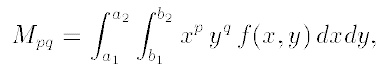

它的低阶M00，M01, M10可以用来计算质心，中心化以后M11,M02,M20可以用来计算区域的方向/角度

### 2.什么是质心

就是通过该点，区域达到一种质量上的平衡状态，可能物理学上讲的比较多，简单点的说就是规则几何物体的中心，不规则的可以通过挂绳子的方法来寻找。

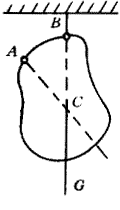

二：算法流程

1.      输入图像转换为二值图像

2.      通过连通组件标记算法找到所有的连通区域，并分别标记

3.      对每个连通区域运用计算几何距算法得到质心

4.      用不同颜色绘制连通区域与质心，输出处理后图像

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage
import skimage.io
import imageio
import math

In [7]:
src = imageio.imread('../datas/blob.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [9]:
def moments2e(img):
    image = img
    if len(img.shape) > 2:
        image = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#     assert len(image.shape) == 2 # only for grayscale images        
    x, y = np.mgrid[:image.shape[0],:image.shape[1]]
    moments = {}
    moments['mean_x'] = np.sum(x*image)/np.sum(image)
    moments['mean_y'] = np.sum(y*image)/np.sum(image)
           
    # raw or spatial moments
    moments['m00'] = np.sum(image)
    moments['m01'] = np.sum(x*image)
    moments['m10'] = np.sum(y*image)
    moments['m11'] = np.sum(y*x*image)
    moments['m02'] = np.sum(x**2*image)
    moments['m20'] = np.sum(y**2*image)
    moments['m12'] = np.sum(x*y**2*image)
    moments['m21'] = np.sum(x**2*y*image)
    moments['m03'] = np.sum(x**3*image)
    moments['m30'] = np.sum(y**3*image)
  
    # central moments
    # moments['mu01']= sum((y-moments['mean_y'])*image) # should be 0
    # moments['mu10']= sum((x-moments['mean_x'])*image) # should be 0
    moments['mu11'] = np.sum((x-moments['mean_x'])*(y-moments['mean_y'])*image)
    moments['mu02'] = np.sum((y-moments['mean_y'])**2*image) # variance
    moments['mu20'] = np.sum((x-moments['mean_x'])**2*image) # variance
    moments['mu12'] = np.sum((x-moments['mean_x'])*(y-moments['mean_y'])**2*image)
    moments['mu21'] = np.sum((x-moments['mean_x'])**2*(y-moments['mean_y'])*image) 
    moments['mu03'] = np.sum((y-moments['mean_y'])**3*image) 
    moments['mu30'] = np.sum((x-moments['mean_x'])**3*image) 

    
    # opencv versions
    #moments['mu02'] = sum(image*(x-m01/m00)**2)
    #moments['mu02'] = sum(image*(x-y)**2)

    # wiki variations
    #moments['mu02'] = m20 - mean_y*m10 
    #moments['mu20'] = m02 - mean_x*m01
        
    # central standardized or normalized or scale invariant moments
    moments['nu11'] = moments['mu11'] / np.sum(image)**(2/2+1)
    moments['nu12'] = moments['mu12'] / np.sum(image)**(3/2+1)
    moments['nu21'] = moments['mu21'] / np.sum(image)**(3/2+1)
    moments['nu20'] = moments['mu20'] / np.sum(image)**(2/2+1)
    moments['nu03'] = moments['mu03'] / np.sum(image)**(3/2+1) # skewness
    moments['nu30'] = moments['mu30'] / np.sum(image)**(3/2+1) # skewness
    return moments

In [10]:
dst = moments2e(src)

In [11]:
print(dst)

{'mean_x': -38.79423992012425, 'mean_y': -50.98380816960622, 'm00': 34465529, 'm01': -1337064001, 'm10': -1757183919, 'm11': -2052795721, 'm02': 1335922791, 'm20': 646283661, 'm12': -623806233, 'm21': -170447121, 'm03': 521911605, 'm30': -633855643, 'mu11': 2152665096677.7454, 'mu02': 2698213957391.9727, 'mu20': 2686119744740.09, 'mu12': 679688253673185.2, 'mu21': 676546987710072.6, 'mu03': 962748788800993.1, 'mu30': 943882258081257.4, 'nu11': 0.001812201859811412, 'nu12': 9.746470951006961e-05, 'nu21': 9.701426392279622e-05, 'nu20': 0.00226128588446327, 'nu03': 0.00013805451326333852, 'nu30': 0.00013534912454119354}


参考：

- https://blog.csdn.net/jia20003/article/details/17596645
- https://en.wikipedia.org/wiki/Image_moment
- https://en.wikipedia.org/wiki/Central_moment
- https://en.wikipedia.org/wiki/Moment_(mathematics)
- https://en.wikipedia.org/wiki/Standardized_moment
- http://docs.opencv.org/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#moments